# Lightweight Single Person Pose Estimation with Tensorflow
### Using Pre Trained MoveNet model and Tensorflow
### MoveNet singlepose, pose Estimation 
### Lightweight pose estimation
### Useing movenet tflite model

In [1]:
#tensorflow is an dependency
#!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=21fd9fece474b053a1a350eb9eafc32c7a1106206029dfa98c310899956b6001
  Stored in directory: c:\users\isharac\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0


In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

### download pretrained model from tensorflow hub
https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/3

### copy model to project path

In [3]:
#loading model from file
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
#pre allocateing tensors for model
interpreter.allocate_tensors()

In [ ]:
#test code
#capture webcam for detection
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()    
    cv2.imshow('Movement', frame)    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break        
cap.release()
cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(480, 640, 3)
(1, 480, 640, 3)
(1, 192, 192, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>


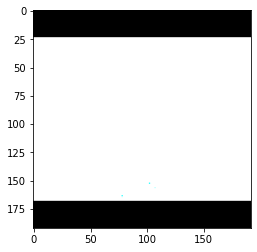

In [25]:
#test code
#image reshapeing breakdown
# Getting copy of frame
image = frame.copy()
# the shape of frame
print(image.shape)

#encapulate frame in another array
image_enc = np.expand_dims(image, axis=0)
#shape of encapsulated image
print(image_enc.shape)

#reshape encapsulated image with resize pad
reshaped_Image = tf.image.resize_with_pad(image_enc, 192,192)
#reshaped image shape
print(reshaped_Image.shape)

#reshaped image is tensor 
print(type(reshaped_Image))

#converting tensor back to intiger by type casting
new_image = tf.cast(np.squeeze(reshaped_Image),dtype=tf.float32)
plt.imshow(new_image)

In [22]:
#test code
#get input detailed from model
print(interpreter.get_input_details())
#get model output detailes
interpreter.get_output_details()

[{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 192, 192,   3]), 'shape_signature': array([  1, 192, 192,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [33]:
#test code
#get index value from output detailes
output_details[0]['index']

312

In [35]:
#test code
#set image as input to model, image is wrapped in numpy array
interpreter.set_tensor(input_details[0]['index'], np.array(reshaped_Image))
#make prediction with model
interpreter.invoke()
#getting reults from the model
keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
print(keypoints_with_scores)

#can use np.squeeze to extract array witihing array
print(np.squeeze(keypoints_with_scores))


[[[[0.7537007  0.5271887  0.39369392]
   [0.71971655 0.57373786 0.5655149 ]
   [0.71553063 0.48083878 0.6121105 ]
   [0.7375107  0.62939894 0.51363486]
   [0.7237599  0.42537516 0.51438344]
   [0.8354615  0.68290675 0.24814764]
   [0.837286   0.39169618 0.20537058]
   [0.83250463 0.73406446 0.07610495]
   [0.6823663  0.37359247 0.05345926]
   [0.7455396  0.61491895 0.10641114]
   [0.7368555  0.43218645 0.05857129]
   [0.70327634 0.6838245  0.06079926]
   [0.6573832  0.39990458 0.07501464]
   [0.6772587  0.7100462  0.06191339]
   [0.69917095 0.3939227  0.02953783]
   [0.7288749  0.63714004 0.04579248]
   [0.72633004 0.45935428 0.03352031]]]]
[[0.7537007  0.5271887  0.39369392]
 [0.71971655 0.57373786 0.5655149 ]
 [0.71553063 0.48083878 0.6121105 ]
 [0.7375107  0.62939894 0.51363486]
 [0.7237599  0.42537516 0.51438344]
 [0.8354615  0.68290675 0.24814764]
 [0.837286   0.39169618 0.20537058]
 [0.83250463 0.73406446 0.07610495]
 [0.6823663  0.37359247 0.05345926]
 [0.7455396  0.61491895 0.1

### Output landmarks array order according to the documentation
 [nose, left eye, right eye, left ear, right ear, left shoulder, right shoulder, left elbow, right elbow, left wrist, right wrist, left hip, right hip, left knee, right knee, left ankle, right ankle]

In [30]:
#test code
#get left eye landmark
leftEye = keypoints_with_scores[0][0][1]
leftEye

array([0.71971655, 0.57373786, 0.5655149 ], dtype=float32)

In [32]:
#test code
#get left eye location pixel location in real image 
#shape of real input image
inputShape = [480,640]
#get cordinates from key Points and multiply it by real image pixel size
leftEyelocation = leftEye[:2]*inputShape
print(leftEyelocation)
#typecast array to numpy array and convert to int data
leftEyelocation = np.array(leftEyelocation).astype(int)
print(leftEyelocation)

[345.46394348 367.19223022]
[345 367]


In [54]:
#function to drow keypoints on the image
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 5, (0,255,0), -1) 

In [41]:
#dictionary of conncetions bitween keypoints
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [47]:
#test code
#get connected keypoints from dictionary
for edge, color in EDGES.items():
    p1, p2 = edge
    print(p1,p2)
    #get corddinates for keypoints
    y1, x1, c1 = shaped[p1]
    y2, x2, c2 = shaped[p2]
    print((int(x1), int(y1)))
    print((int(x2), int(y2)))
    

0 1
(337, 361)
(367, 345)
0 2
(337, 361)
(307, 343)
1 3
(367, 345)
(402, 354)
2 4
(307, 343)
(272, 347)
0 5
(337, 361)
(437, 401)
0 6
(337, 361)
(250, 401)
5 7
(437, 401)
(469, 399)
7 9
(469, 399)
(393, 357)
6 8
(250, 401)
(239, 327)
8 10
(239, 327)
(276, 353)
5 6
(437, 401)
(250, 401)
5 11
(437, 401)
(437, 337)
6 12
(250, 401)
(255, 315)
11 12
(437, 337)
(255, 315)
11 13
(437, 337)
(454, 325)
13 15
(454, 325)
(407, 349)
12 14
(255, 315)
(252, 335)
14 16
(252, 335)
(293, 348)


In [52]:
#(0,0,255) , BGR value for line color
#2 is line thickness

def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)

In [45]:
#test code
shaped[0],shaped[1]

(array([361.77632332, 337.40077972,   0.39369392]),
 array([345.46394348, 367.19223022,   0.56551492]))

In [37]:
#test code
#reshapeing ouput to match input image size
shaped = np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']), [480,640,1]))
print(shaped)

#loop thrue array and print cordinates
for kp in shaped:
    ky, kx, kp_conf = kp
    print(int(ky), int(kx),kp_conf)

[[3.61776323e+02 3.37400780e+02 3.93693924e-01]
 [3.45463943e+02 3.67192230e+02 5.65514922e-01]
 [3.43454704e+02 3.07736816e+02 6.12110496e-01]
 [3.54005127e+02 4.02815323e+02 5.13634861e-01]
 [3.47404747e+02 2.72240105e+02 5.14383435e-01]
 [4.01021519e+02 4.37060318e+02 2.48147637e-01]
 [4.01897278e+02 2.50685558e+02 2.05370575e-01]
 [3.99602222e+02 4.69801254e+02 7.61049539e-02]
 [3.27535830e+02 2.39099178e+02 5.34592606e-02]
 [3.57859011e+02 3.93548126e+02 1.06411144e-01]
 [3.53690643e+02 2.76599331e+02 5.85712940e-02]
 [3.37572641e+02 4.37647667e+02 6.07992634e-02]
 [3.15543938e+02 2.55938931e+02 7.50146359e-02]
 [3.25084162e+02 4.54429550e+02 6.19133897e-02]
 [3.35602055e+02 2.52110519e+02 2.95378342e-02]
 [3.49859962e+02 4.07769623e+02 4.57924828e-02]
 [3.48638420e+02 2.93986740e+02 3.35203111e-02]]
361 337 0.3936939239501953
345 367 0.5655149221420288
343 307 0.6121104955673218
354 402 0.5136348605155945
347 272 0.5143834352493286
401 437 0.2481476366519928
401 250 0.20537057518

In [55]:
#capture webcam for detection
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    #reshape image to 192 x 192 x 3
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    #print(keypoints_with_scores)
    
    # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    cv2.imshow('Movement', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()